# Load Dependencies

In [1]:
%matplotlib inline

import torch
import random
import re
import os
import pickle
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress.fastprogress import master_bar, progress_bar
import sys
sys.path.append('../../scripts/')

from config_plots import global_settings
global_settings()

from filters import Filter
from DNN import DNN
from gradient import *
import warnings
warnings.filterwarnings("ignore")

os.chdir('../../gradients/')

# Gradient

## Load Loss Curve

In [2]:
paths = {}
loss_csv = {}
for path in glob.glob('*'):
    name = path.split('_')[0]
    paths[name] = path
    result_path = path + '/results/'
    if len(glob.glob(result_path + '*.csv')):
        loss_df = pd.read_csv(glob.glob(result_path + '*.csv')[0])
        loss_csv[name] = loss_df

## Calculate Gradient

In [3]:
grad_angles = {}

for path in glob.glob('*'):
    name = path.split('_')[0]
    print(name, path)
    grad_path = path + '/grads/'
    state_path = path + '/states/'
    grad_angles[name] = []
    for epoch in range(499):
        angle = grad_angle(grad_path, state_path, epoch, max(range(500)))
        grad_angles[name].append(angle)

angles_all = {
    'cNSE-NNex': calc_angles('cNSE-NNex', grad_angles),
    'NSE-NNex': calc_angles('NSE-NNex', grad_angles),
}

cNSE-NNex cNSE-NNex_-0x5149a81eb2a3846a
NSE-NNex NSE-NNex_0x42d082ccd3926e1


## Calculate Projections

In [4]:
grad_projections = {}

for path in glob.glob('*'):
    name = path.split('_')[0]
    print(name, path)
    grad_path = path + '/grads/'
    state_path = path + '/states/'
    grad_projections[name] = []
    for epoch in range(499):
        project = grad_projection(grad_path, state_path, epoch, max(range(500)))
        grad_projections[name].append(project)
    

projections_all = {
    'cNSE-NNex': calc_projections('cNSE-NNex', grad_projections),
    'NSE-NNex': calc_projections('NSE-NNex', grad_projections),
}

cNSE-NNex cNSE-NNex_-0x5149a81eb2a3846a
NSE-NNex NSE-NNex_0x42d082ccd3926e1


# Consine Similarity

## NSE-DNN$_{ex}$

In [5]:
param_angles = angles_all['NSE-NNex']

### Detailed View

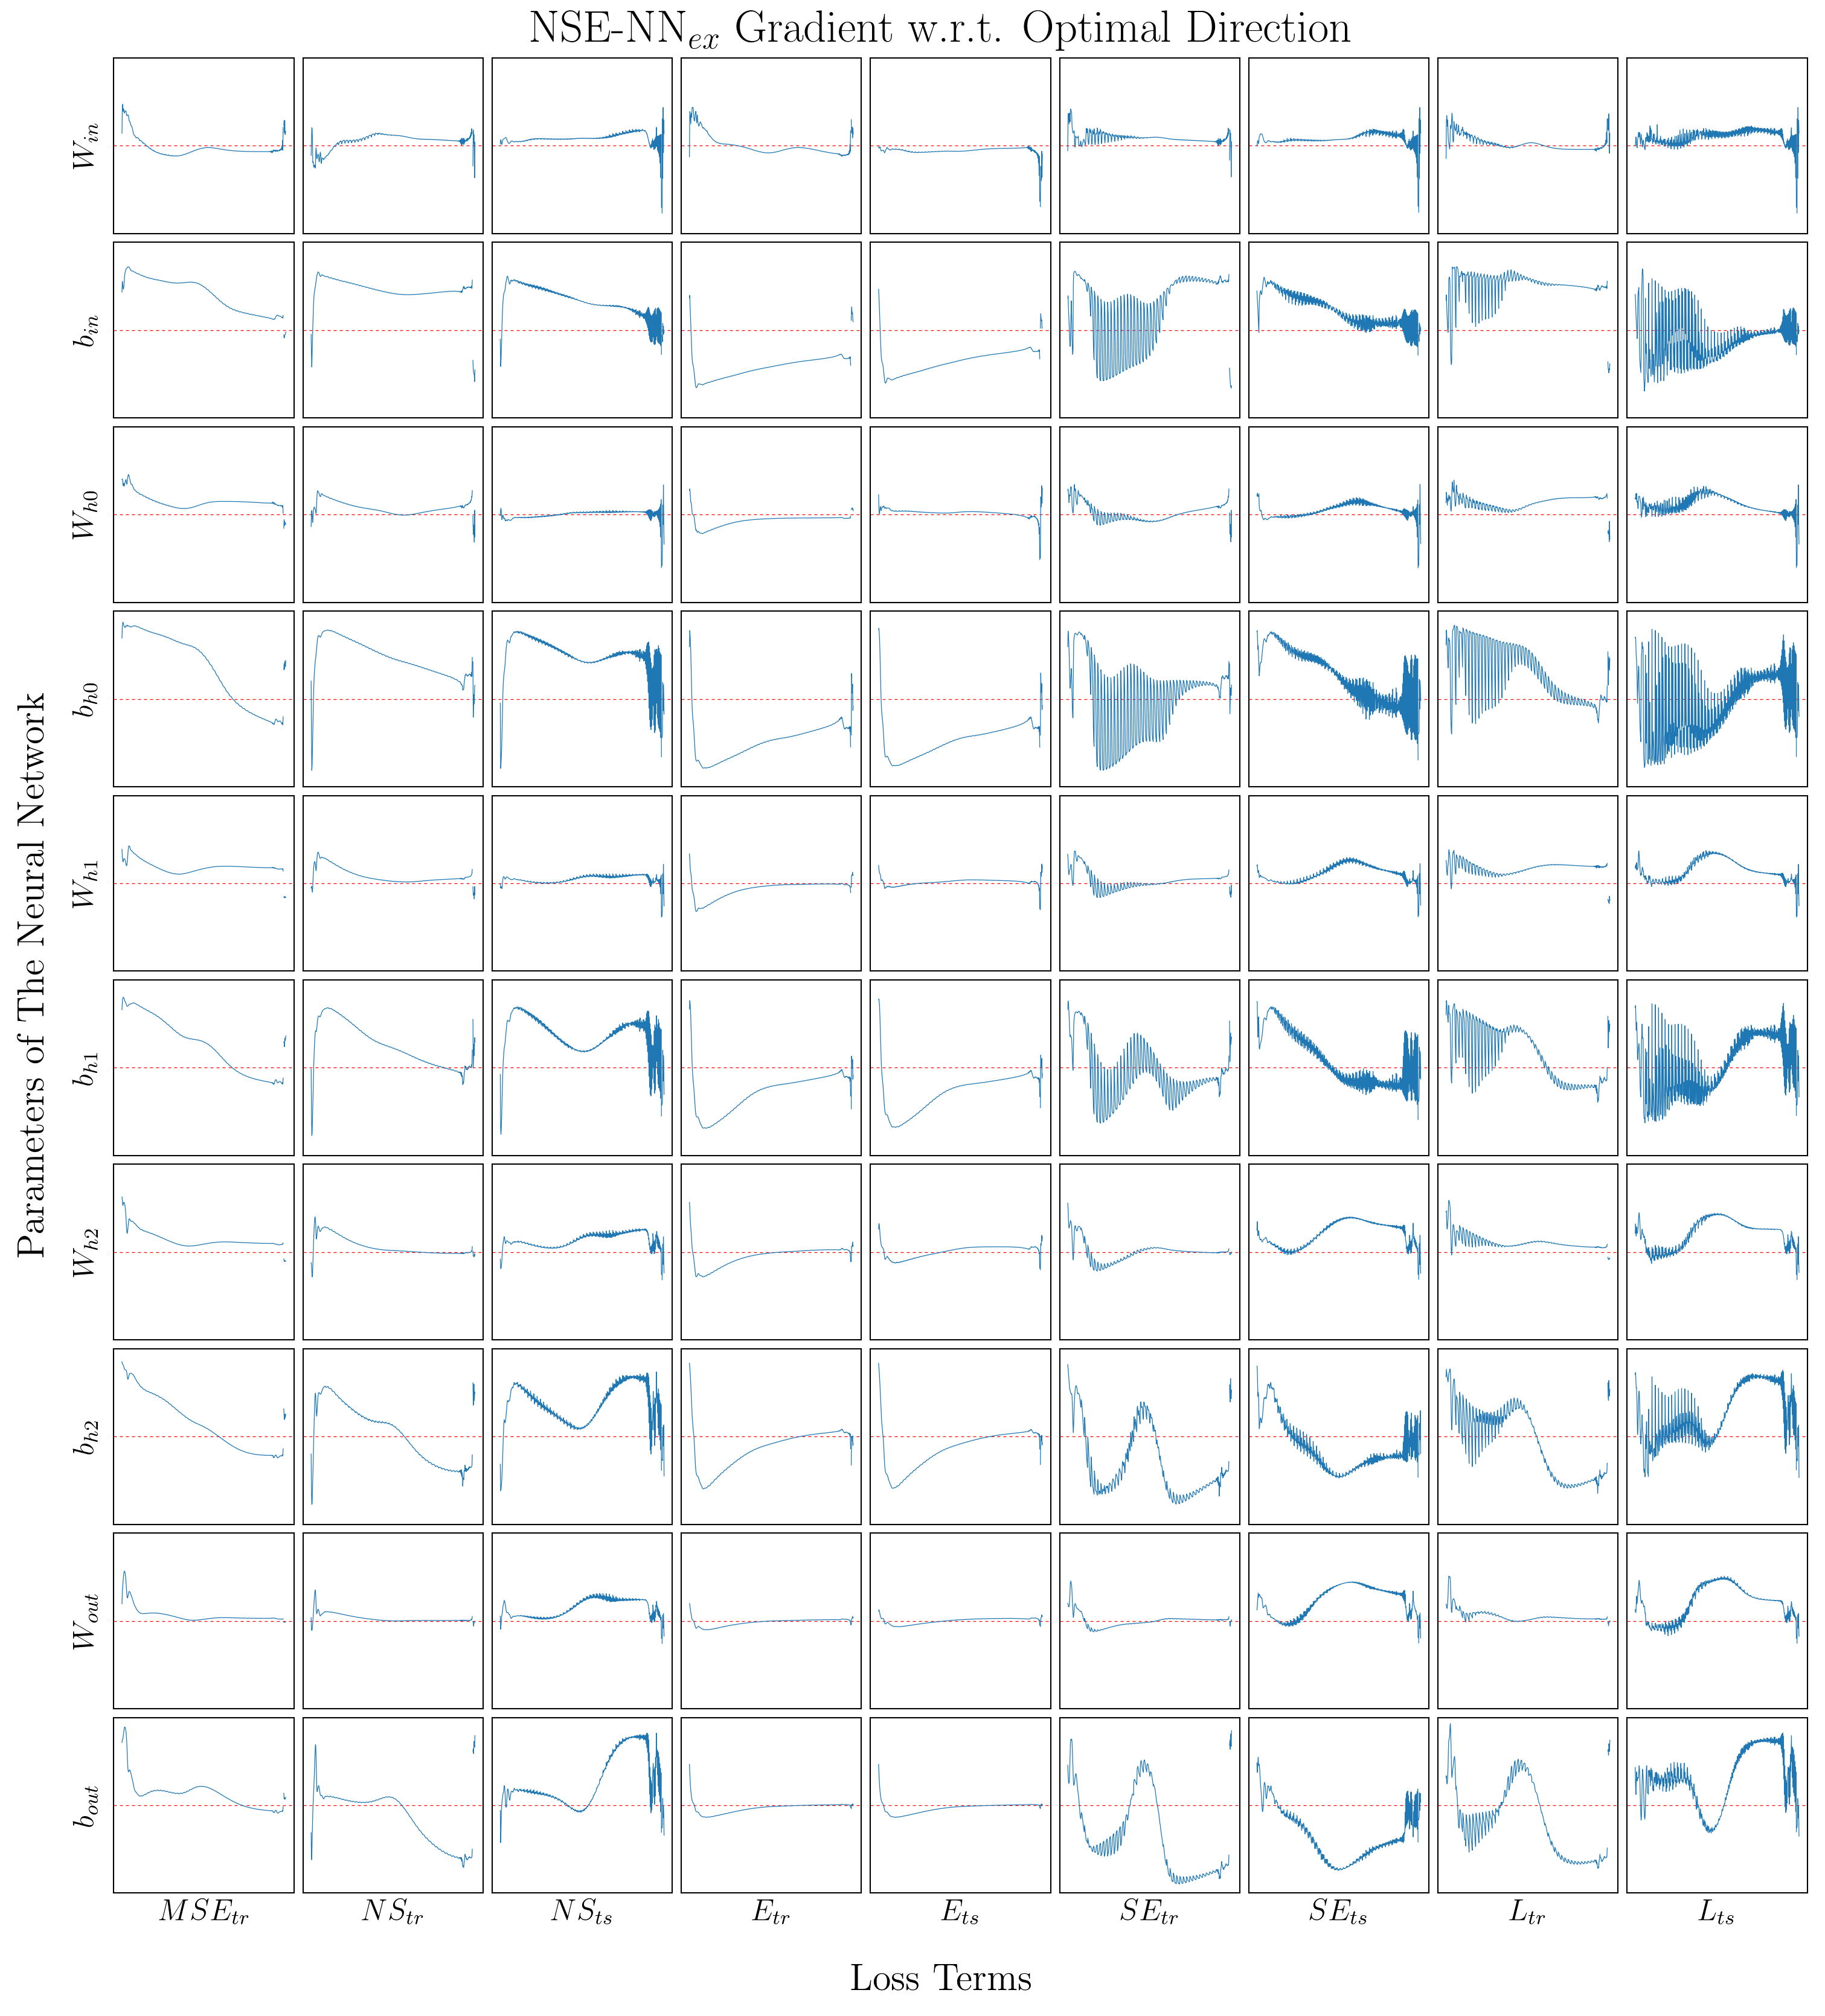

In [6]:
param_list = list(param_angles.keys())
loss_list = list(list(param_angles.values())[0].keys())
xlabels = ['$MSE_{tr}$', '$NS_{tr}$', '$NS_{ts}$', '$E_{tr}$', '$E_{ts}$', '$SE_{tr}$', '$SE_{ts}$', '$L_{tr}$', '$L_{ts}$']
ylabels = ['$W_{in}$', '$b_{in}$', '$W_{h0}$', '$b_{h0}$', '$W_{h1}$', '$b_{h1}$', '$W_{h2}$', '$b_{h2}$', '$W_{out}$', '$b_{out}$']
row_num = len(param_list)
col_num = len(loss_list)

fig, axes = plt.subplots(row_num, col_num, figsize=(10, 11), dpi=300)
for i in range(row_num):
    for j in range(col_num):
        ax = axes[i, j]
        ax.axhline(0, color='r', lw=0.3, dashes=(4,4))
        ax.plot(param_angles[param_list[i]][loss_list[j]], lw=0.3)
        ax.set(ylim=(-1, 1))
        
for ax, loss in zip(axes[-1, :], xlabels):
    ax.set_xlabel(loss, size=12)

for ax, param in zip(axes[:, 0], ylabels):
    ax.set_ylabel(param, size=12)
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.setp(ax.spines.values(), lw=0.5)
    
fig.suptitle("NSE-NN$_{ex}$ Gradient w.r.t. Optimal Direction")
fig.tight_layout()
fig.subplots_adjust(top=0.96)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.text(0.5, -0.01, 'Loss Terms', ha='center', fontsize=15)
fig.text(-0.01, 0.5, 'Parameters of The Neural Network', va='center', rotation='vertical', fontsize=15)
plt.show()

## cNSE-DNN$_{ex}$

In [7]:
param_angles = angles_all['cNSE-NNex']

### Detailed View

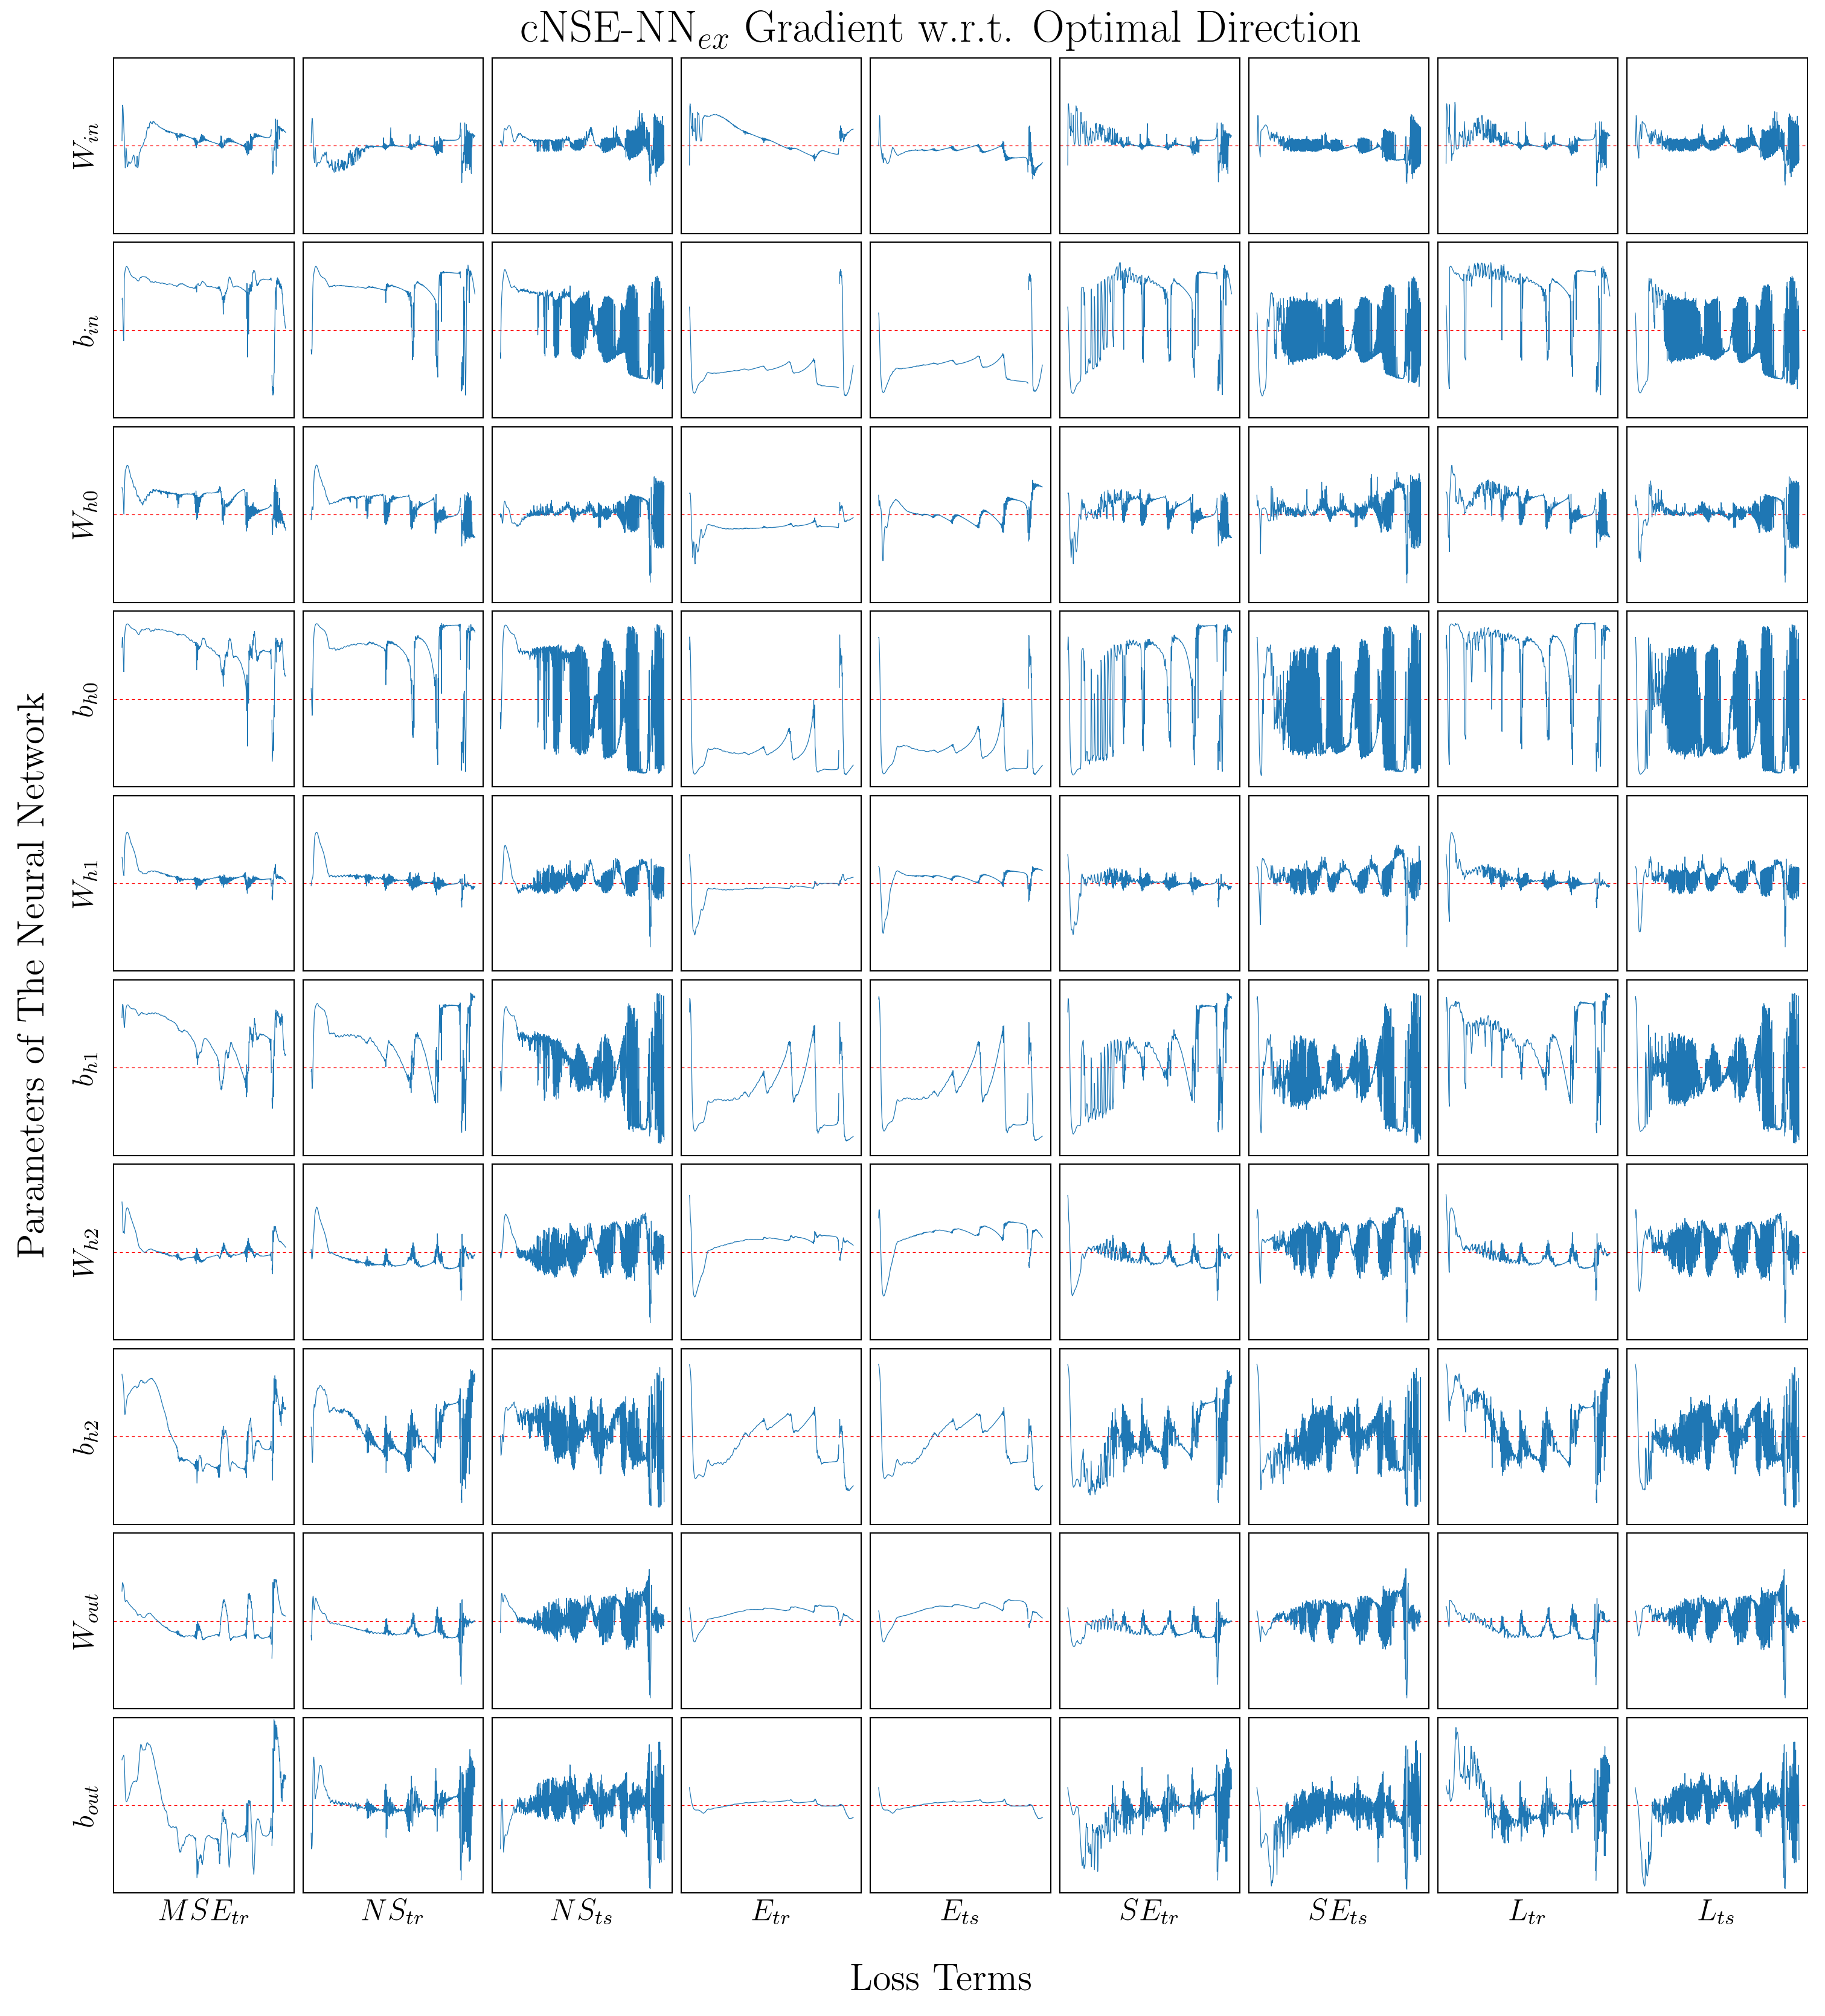

In [8]:
param_list = list(param_angles.keys())
loss_list = list(list(param_angles.values())[0].keys())
xlabels = ['$MSE_{tr}$', '$NS_{tr}$', '$NS_{ts}$', '$E_{tr}$', '$E_{ts}$', '$SE_{tr}$', '$SE_{ts}$', '$L_{tr}$', '$L_{ts}$']
ylabels = ['$W_{in}$', '$b_{in}$', '$W_{h0}$', '$b_{h0}$', '$W_{h1}$', '$b_{h1}$', '$W_{h2}$', '$b_{h2}$', '$W_{out}$', '$b_{out}$']
row_num = len(param_list)
col_num = len(loss_list)

fig, axes = plt.subplots(row_num, col_num, figsize=(10, 11), dpi=300)
for i in range(row_num):
    for j in range(col_num):
        ax = axes[i, j]
        ax.axhline(0, color='r', lw=0.3, dashes=(4,4))
        ax.plot(param_angles[param_list[i]][loss_list[j]], lw=0.3)
        ax.set(ylim=(-1, 1))
        
for ax, loss in zip(axes[-1, :], xlabels):
    ax.set_xlabel(loss, size=12)

for ax, param in zip(axes[:, 0], ylabels):
    ax.set_ylabel(param, size=12)
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.setp(ax.spines.values(), lw=0.5)
    
fig.suptitle("cNSE-NN$_{ex}$ Gradient w.r.t. Optimal Direction")
fig.tight_layout()
fig.subplots_adjust(top=0.96)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.text(0.5, -0.01, 'Loss Terms', ha='center', fontsize=15)
fig.text(-0.01, 0.5, 'Parameters of The Neural Network', va='center', rotation='vertical', fontsize=15)
plt.show()

### All Models

cNSE-NNex cNSE-NNex_-0x5149a81eb2a3846a
NSE-NNex NSE-NNex_0x42d082ccd3926e1


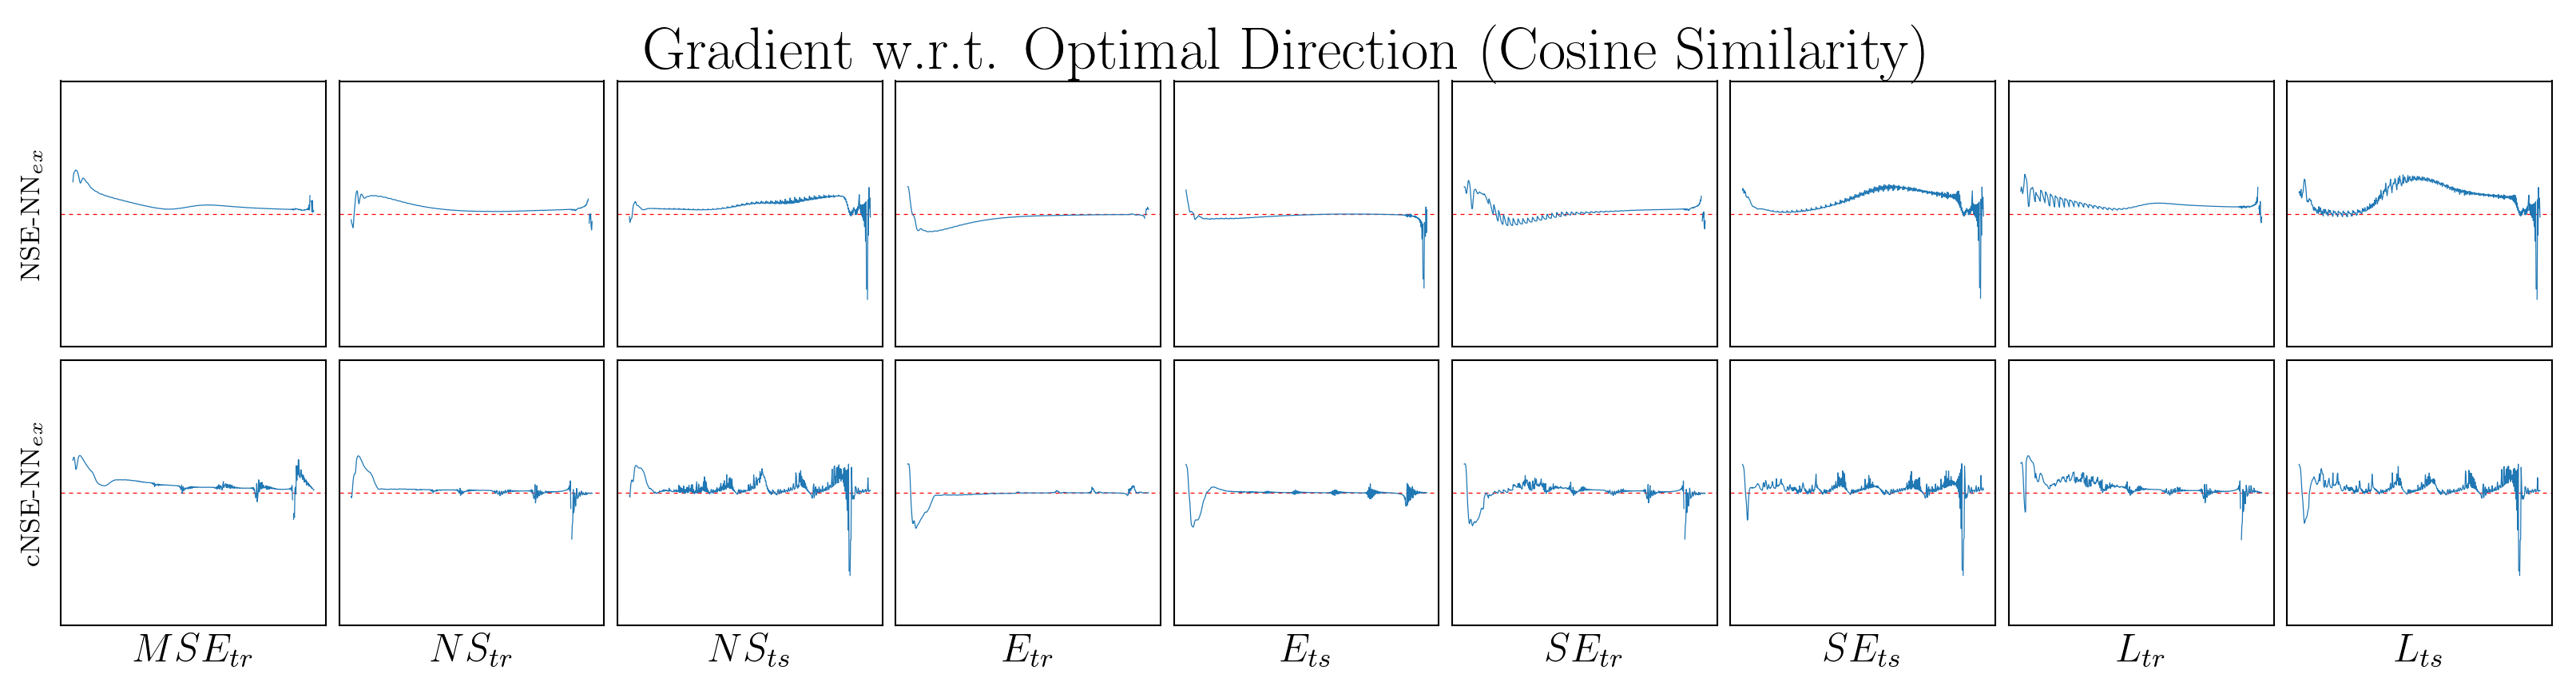

In [9]:
overall_angle = calc_overall_angle()

xlabels = ['$MSE_{tr}$', '$NS_{tr}$', '$NS_{ts}$', '$E_{tr}$', '$E_{ts}$', '$SE_{tr}$', '$SE_{ts}$', '$L_{tr}$', '$L_{ts}$']
ylabels = ['NSE-NN$_{ex}$', 'cNSE-NN$_{ex}$']
loss_list = ['train_mse', 'train_s_norm', 'test_s_norm', 'train_e', 'test_e', 'train_se', 'test_se', 'train_all', 'test_all']
model_list = ['NSE-NNex', 'cNSE-NNex']

col_num = len(loss_list)
row_num = len(model_list)
fig, axes = plt.subplots(row_num, col_num, figsize=(11, 3), dpi=300)

models, losses, contributions = [], [], []
for i in range(row_num):
    param_angles = overall_angle[model_list[i]]
    for j in range(col_num):
        loss = loss_list[j]
        angle = param_angles[loss].values
        models.append(model_list[i])
        losses.append(loss)
        contributions.append(np.mean(angle))
        ax = axes[i, j]
        ax.axhline(0, color='r', lw=0.3, dashes=(4,4))
        ax.plot(angle, lw=0.3)
        ax.set(ylim=(-1, 1))

for ax, xlabel in zip(axes[-1, :], xlabels):
    ax.set_xlabel(xlabel, size=12)

for ax, ylabel in zip(axes[:, 0], ylabels):
    ax.set_ylabel(ylabel, size=8)
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.setp(ax.spines.values(), lw=0.5)
    
fig.suptitle("Gradient w.r.t. Optimal Direction (Cosine Similarity)")
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.show()

models = np.array(models)
losses = np.array(losses)
contributions = np.array(contributions)
data = contributions.reshape((len(model_list), len(loss_list)))
df = pd.DataFrame(index=ylabels, columns=xlabels, data=data)

# df

# Projection (Scale Considered)

## NSE-DNN$_{ex}$

Wave Function Overlap = 0.9978036880493164

In [10]:
param_projections = projections_all['NSE-NNex']

### Detailed View

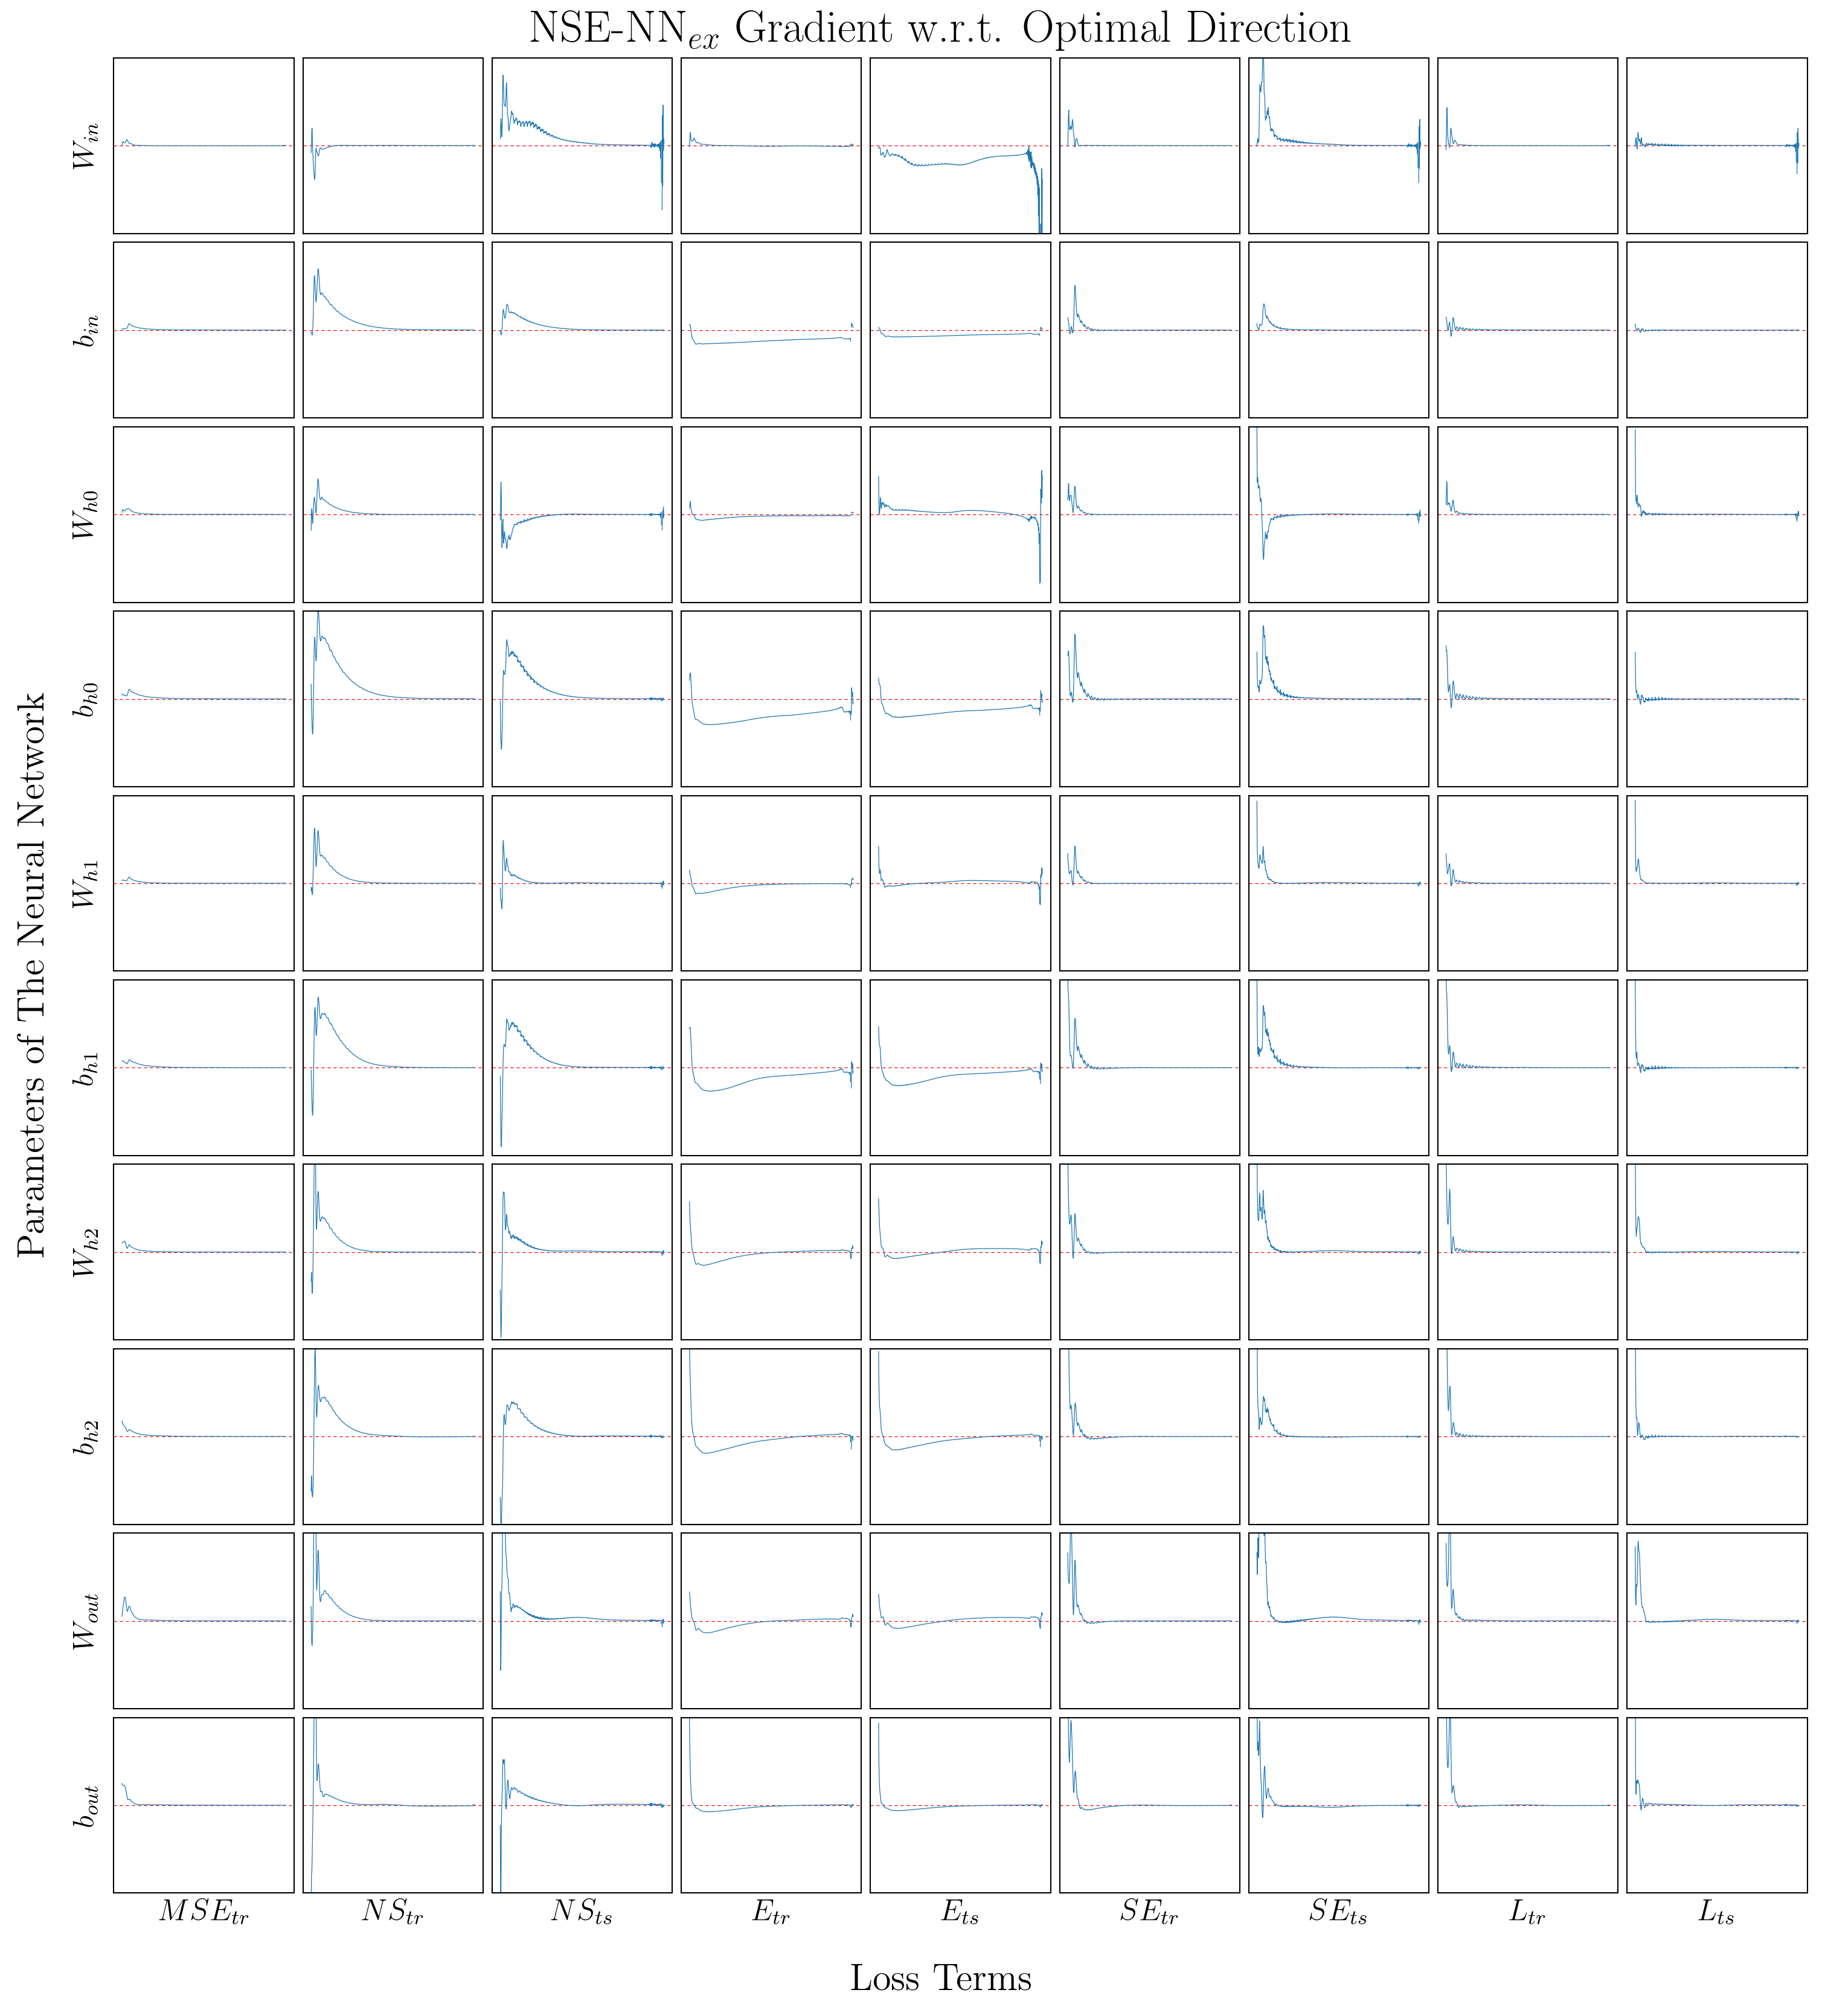

In [11]:
param_list = list(param_projections.keys())
loss_list = list(list(param_projections.values())[0].keys())
xlabels = ['$MSE_{tr}$', '$NS_{tr}$', '$NS_{ts}$', '$E_{tr}$', '$E_{ts}$', '$SE_{tr}$', '$SE_{ts}$', '$L_{tr}$', '$L_{ts}$']
ylabels = ['$W_{in}$', '$b_{in}$', '$W_{h0}$', '$b_{h0}$', '$W_{h1}$', '$b_{h1}$', '$W_{h2}$', '$b_{h2}$', '$W_{out}$', '$b_{out}$']
row_num = len(param_list)
col_num = len(loss_list)

fig, axes = plt.subplots(row_num, col_num, figsize=(10, 11), dpi=300)
for i in range(row_num):
    for j in range(col_num):
        ax = axes[i, j]
        ax.axhline(0, color='r', lw=0.3, dashes=(4,4))
        ax.plot(param_projections[param_list[i]][loss_list[j]], lw=0.3)
        ax.set(ylim=(-0.5, 0.5))
        
for ax, loss in zip(axes[-1, :], xlabels):
    ax.set_xlabel(loss, size=12)

for ax, param in zip(axes[:, 0], ylabels):
    ax.set_ylabel(param, size=12)
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.setp(ax.spines.values(), lw=0.5)
    
fig.suptitle("NSE-NN$_{ex}$ Gradient w.r.t. Optimal Direction")
fig.tight_layout()
fig.subplots_adjust(top=0.96)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.text(0.5, -0.01, 'Loss Terms', ha='center', fontsize=15)
fig.text(-0.01, 0.5, 'Parameters of The Neural Network', va='center', rotation='vertical', fontsize=15)
plt.show()

## C-NSE-DNN$_{ex}$

Wave Function Overlap = 0.9963504672050476

In [12]:
param_projections = projections_all['cNSE-NNex']

### Detailed View

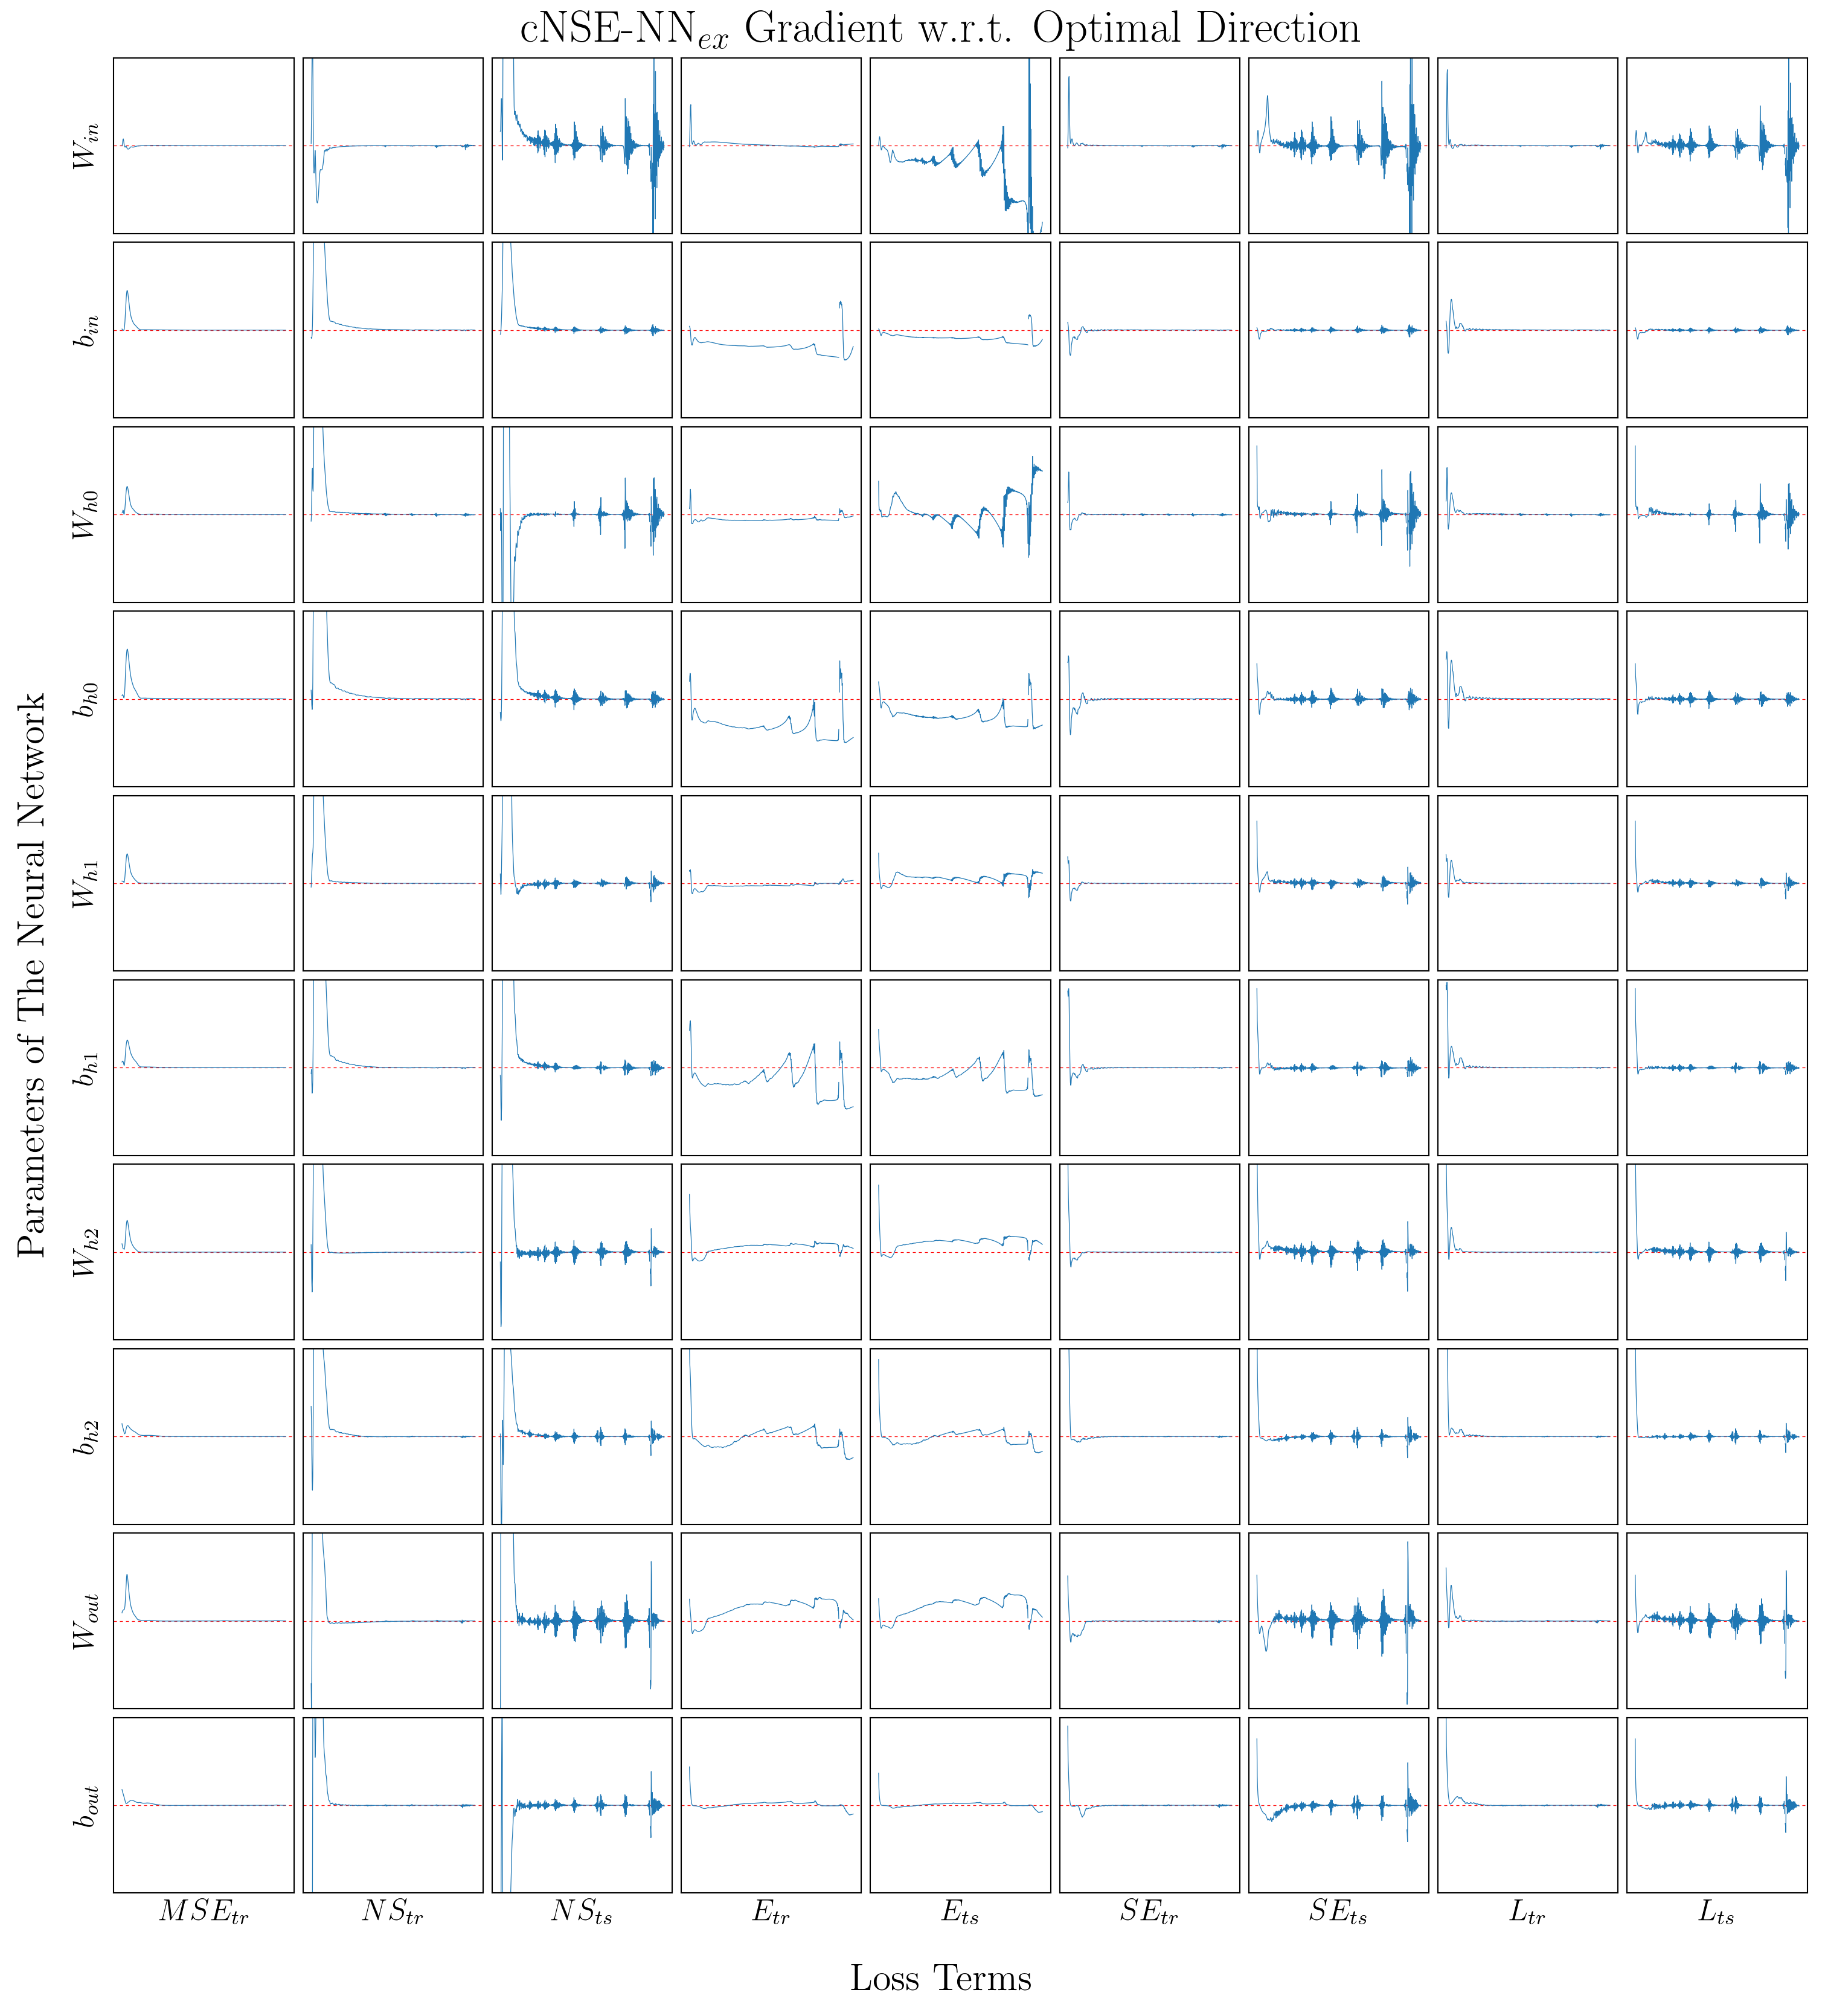

In [13]:
param_list = list(param_projections.keys())
loss_list = list(list(param_projections.values())[0].keys())
xlabels = ['$MSE_{tr}$', '$NS_{tr}$', '$NS_{ts}$', '$E_{tr}$', '$E_{ts}$', '$SE_{tr}$', '$SE_{ts}$', '$L_{tr}$', '$L_{ts}$']
ylabels = ['$W_{in}$', '$b_{in}$', '$W_{h0}$', '$b_{h0}$', '$W_{h1}$', '$b_{h1}$', '$W_{h2}$', '$b_{h2}$', '$W_{out}$', '$b_{out}$']
row_num = len(param_list)
col_num = len(loss_list)

fig, axes = plt.subplots(row_num, col_num, figsize=(10, 11), dpi=300)
for i in range(row_num):
    for j in range(col_num):
        ax = axes[i, j]
        ax.axhline(0, color='r', lw=0.3, dashes=(4,4))
        ax.plot(param_projections[param_list[i]][loss_list[j]], lw=0.3)
        ax.set(ylim=(-0.5, 0.5))
        
for ax, loss in zip(axes[-1, :], xlabels):
    ax.set_xlabel(loss, size=12)

for ax, param in zip(axes[:, 0], ylabels):
    ax.set_ylabel(param, size=12)
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.setp(ax.spines.values(), lw=0.5)
    
fig.suptitle("cNSE-NN$_{ex}$ Gradient w.r.t. Optimal Direction")
fig.tight_layout()
fig.subplots_adjust(top=0.96)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.text(0.5, -0.01, 'Loss Terms', ha='center', fontsize=15)
fig.text(-0.01, 0.5, 'Parameters of The Neural Network', va='center', rotation='vertical', fontsize=15)
plt.show()

### All Models

In [14]:
overall_projection = calc_overall_projection()

cNSE-NNex cNSE-NNex_-0x5149a81eb2a3846a
NSE-NNex NSE-NNex_0x42d082ccd3926e1


In [15]:
overall_projection['NSE-NNex'].max()

train_mse       0.104295
train_s_norm    0.942001
test_s_norm     0.751599
train_e         0.341962
test_e          0.480375
train_se        0.782440
test_se         1.088024
train_all       0.769490
test_all        1.044151
dtype: float64

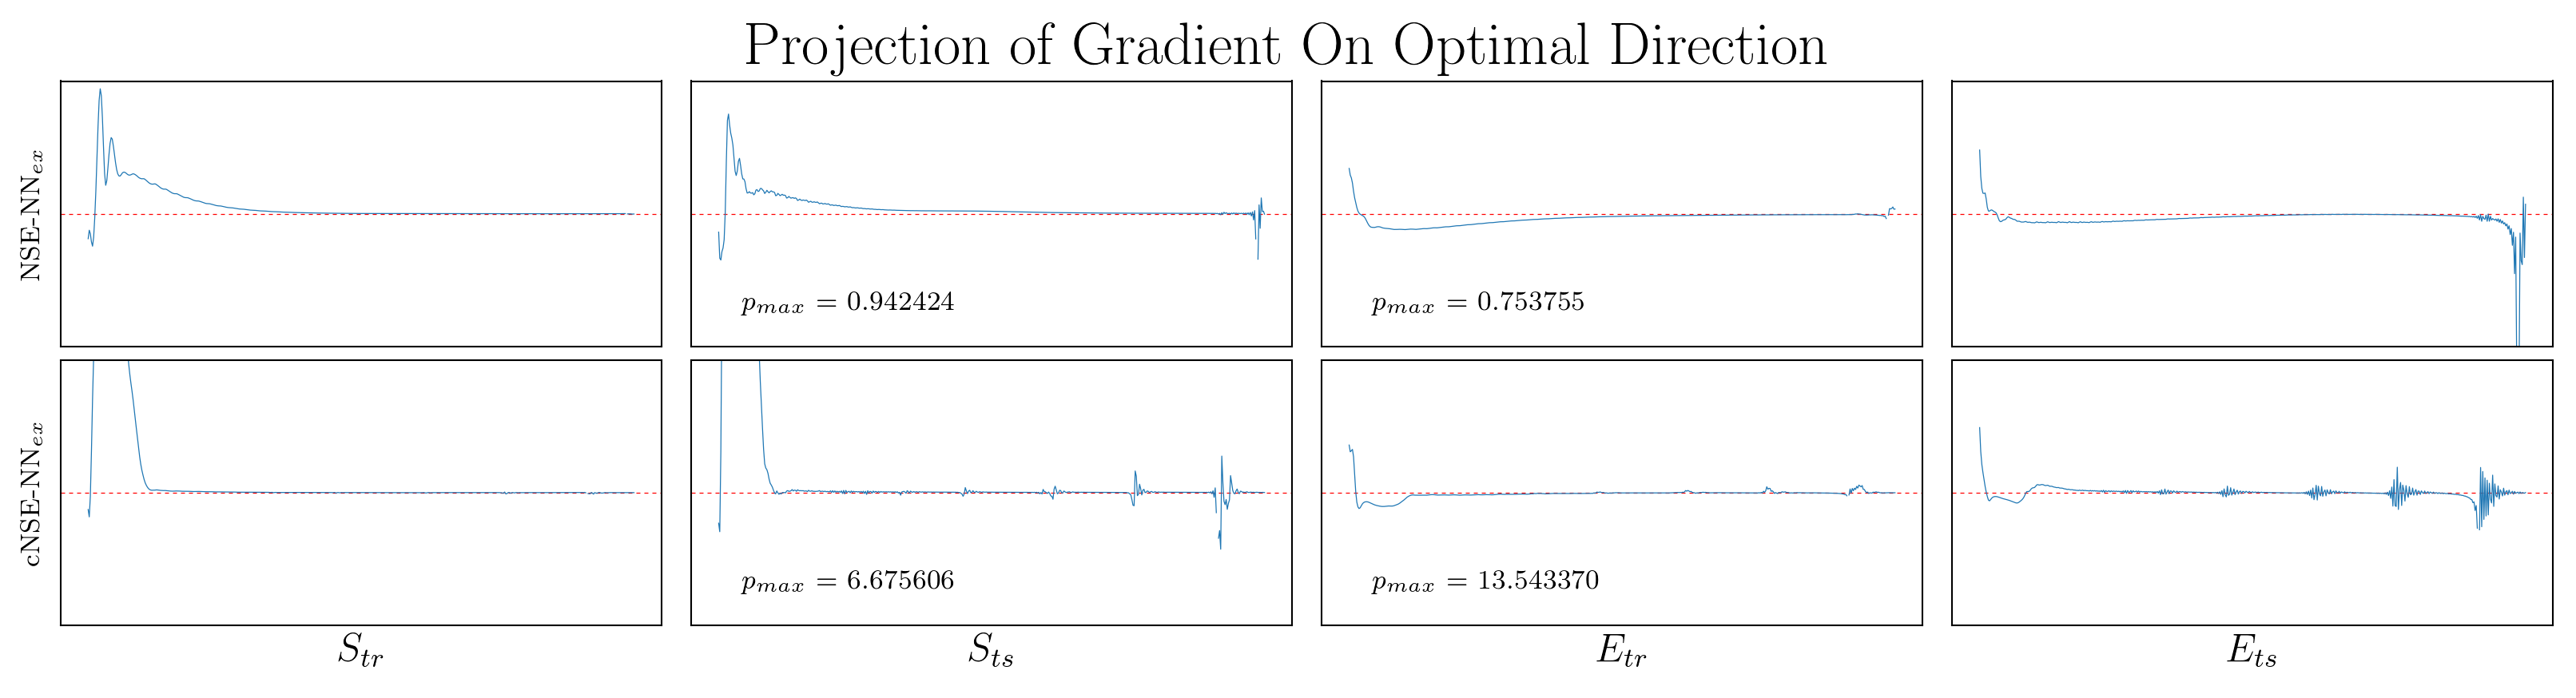

In [16]:
xlabels = ['$S_{tr}$', '$S_{ts}$', '$E_{tr}$', '$E_{ts}$']
ylabels = ['NSE-NN$_{ex}$', 'cNSE-NN$_{ex}$']
loss_list = ['train_s_norm', 'test_s_norm', 'train_e', 'test_e']
model_list = ['NSE-NNex', 'cNSE-NNex']

col_num = len(loss_list)
row_num = len(model_list)
fig, axes = plt.subplots(row_num, col_num, figsize=(11, 3), dpi=300)

models, losses, contributions = [], [], []
for i in range(row_num):
    param_projections = overall_projection[model_list[i]]
    for j in range(col_num):
        loss = loss_list[j]
        project = param_projections[loss].values
        models.append(model_list[i])
        losses.append(loss)
        contributions.append(np.mean(project))
        ax = axes[i, j]
        ax.axhline(0, color='r', lw=0.3, dashes=(4,4))
        ax.plot(project, lw=0.3)
        ax.set(ylim=(-1, 1))

for ax, xlabel in zip(axes[-1, :], xlabels):
    ax.set_xlabel(xlabel, size=12)

for ax, ylabel in zip(axes[:, 0], ylabels):
    ax.set_ylabel(ylabel, size=8)
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.setp(ax.spines.values(), lw=0.5)

axes[1][1].text(x=20, y=-0.75, s='$p_{max}$ = 6.675606', fontsize=8)
axes[1][2].text(x=20, y=-0.75, s='$p_{max}$ = 13.543370', fontsize=8)  
axes[0][1].text(x=20, y=-0.75, s='$p_{max}$ = 0.942424', fontsize=8)
axes[0][2].text(x=20, y=-0.75, s='$p_{max}$ = 0.753755', fontsize=8)  

fig.suptitle("Projection of Gradient On Optimal Direction")
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

models = np.array(models)
losses = np.array(losses)
contributions = np.array(contributions)
data = contributions.reshape((len(model_list), len(loss_list)))
df = pd.DataFrame(index=ylabels, columns=xlabels, data=data)

# df

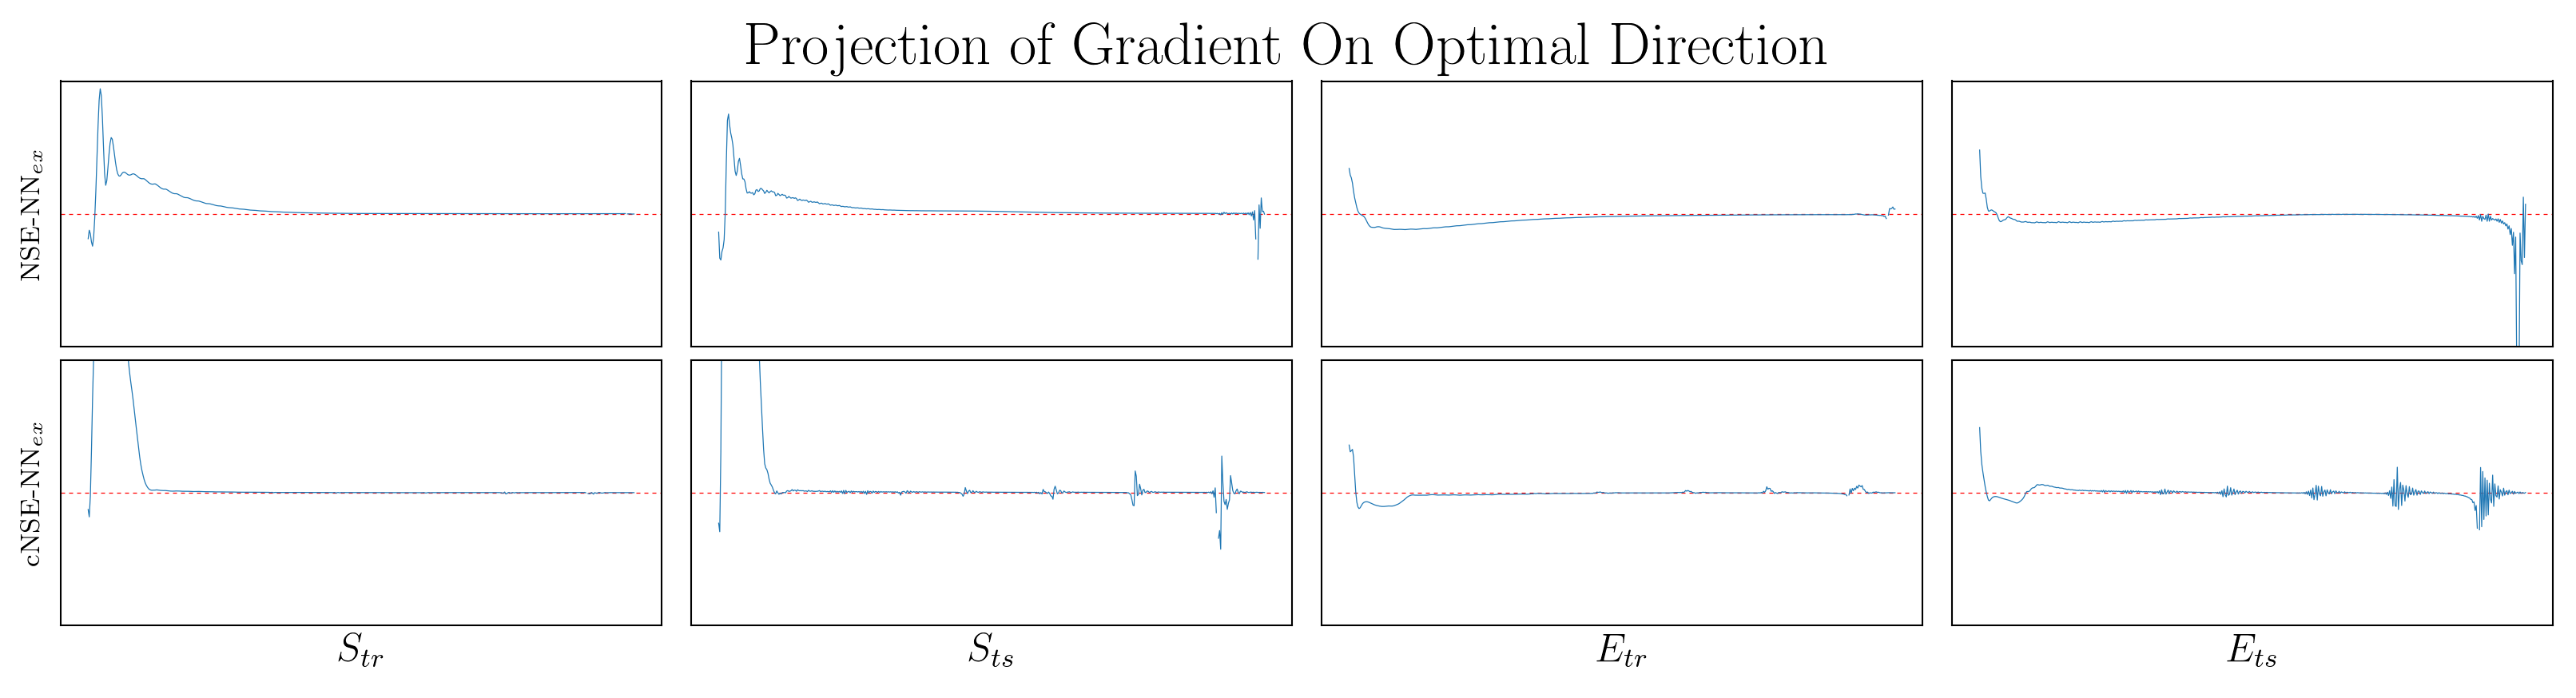

In [17]:
xlabels = ['$S_{tr}$', '$S_{ts}$', '$E_{tr}$', '$E_{ts}$']
ylabels = ['NSE-NN$_{ex}$', 'cNSE-NN$_{ex}$']
loss_list = ['train_s_norm', 'test_s_norm', 'train_e', 'test_e']
model_list = ['NSE-NNex', 'cNSE-NNex']

col_num = len(loss_list)
row_num = len(model_list)
fig, axes = plt.subplots(row_num, col_num, figsize=(11, 3), dpi=300)

models, losses, contributions = [], [], []
for i in range(row_num):
    param_projections = overall_projection[model_list[i]]
    for j in range(col_num):
        loss = loss_list[j]
        project = param_projections[loss].values
        models.append(model_list[i])
        losses.append(loss)
        contributions.append(np.mean(project))
        ax = axes[i, j]
        ax.axhline(0, color='r', lw=0.3, dashes=(4,4))
        ax.plot(project, lw=0.3)
        ax.set(ylim=(-1, 1))

for ax, xlabel in zip(axes[-1, :], xlabels):
    ax.set_xlabel(xlabel, size=12)

for ax, ylabel in zip(axes[:, 0], ylabels):
    ax.set_ylabel(ylabel, size=8)
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.setp(ax.spines.values(), lw=0.5)
    
fig.suptitle("Projection of Gradient On Optimal Direction")
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

models = np.array(models)
losses = np.array(losses)
contributions = np.array(contributions)
data = contributions.reshape((len(model_list), len(loss_list)))
df = pd.DataFrame(index=ylabels, columns=xlabels, data=data)

# df

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


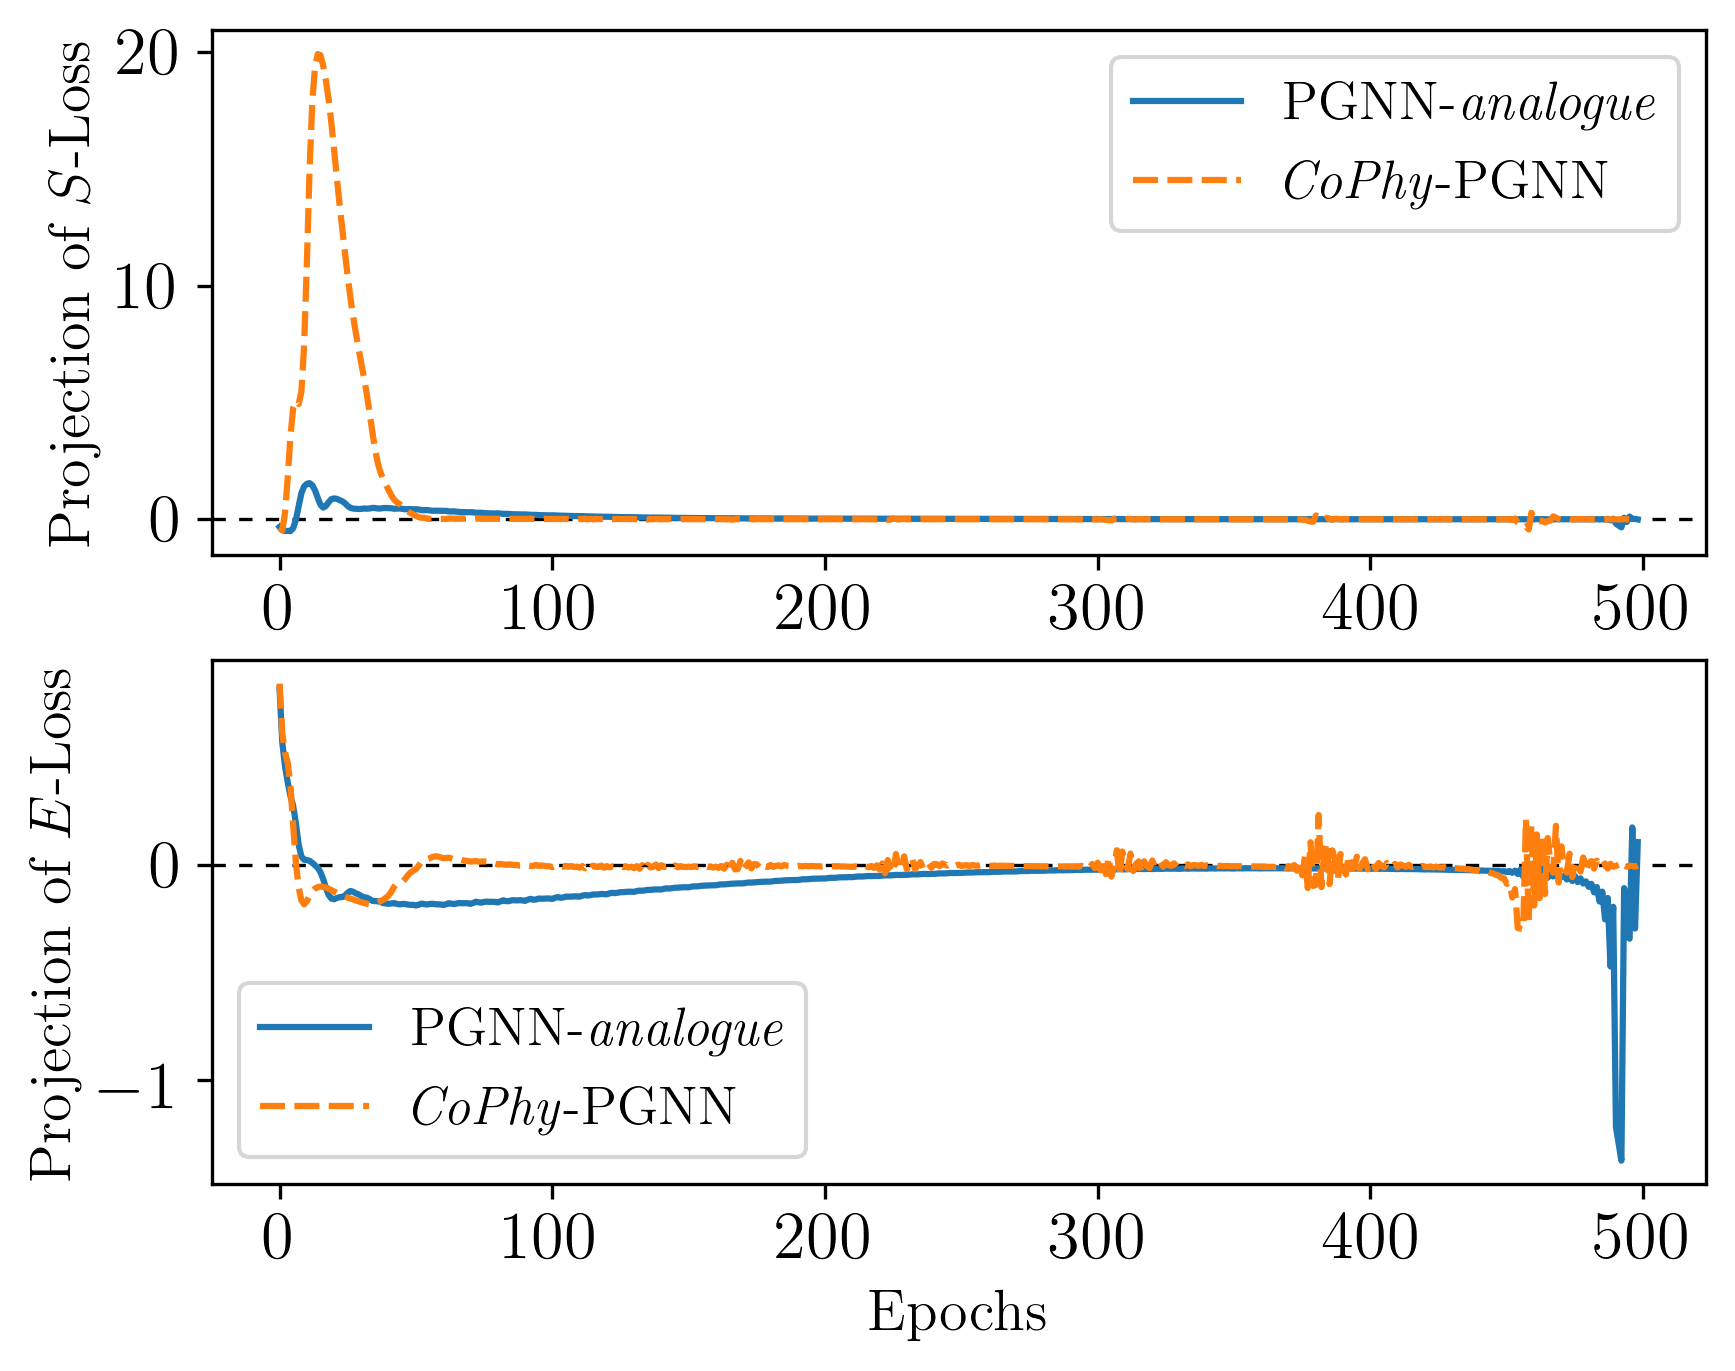

In [18]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

c = overall_projection['cNSE-NNex']
S_c = c['train_s_norm'] + c['test_s_norm']
E_c = c['train_e'] + c['test_e']

nc = overall_projection['NSE-NNex']
S_nc = nc['train_s_norm'] + nc['test_s_norm']
E_nc = nc['train_e'] + nc['test_e']

df_s = pd.DataFrame({
    'PGNN-\emph{analogue}': S_nc,
    '\emph{CoPhy}-PGNN': S_c
})

df_e = pd.DataFrame({
    
    'PGNN-\emph{analogue}': E_nc,
    '\emph{CoPhy}-PGNN': E_c
})


fig, axes = plt.subplots(2, 1, figsize=(6, 4.5))
ax = axes[0]
ax.axhline(0, color='black', dashes=(4,4), lw=0.8)
sns.lineplot(data=df_s, ax=ax)
ax.set_ylabel('Projection of $S$-Loss', fontsize=14)
fig.subplots_adjust(right=0.98, top=0.98)
ax.legend(fontsize=13)

ax = axes[1]
ax.axhline(0, color='black', dashes=(4,4), lw=0.8)
sns.lineplot(data=df_e, ax=ax)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Projection of $E$-Loss', fontsize=14)
ax.legend(fontsize=13)
fig.subplots_adjust(left=0.15, right=0.98, top=0.98)

fig.savefig('../figures/Gradient_Analysis.pdf', dpi=300)
plt.show()

# How Different Are The Models From Each Other

In [19]:
paths = {}
final_states = {}

for path in glob.glob('*'):
    name = path.split('_')[0]
    paths[name] = path
    model_path = glob.glob(path + '/models/*')[0]
    final_states[name] = torch.load(model_path)

param_1 = final_states['cNSE-NNex']
param_2 = final_states['NSE-NNex']

cos_final = np.zeros((1, len(param_1)))

i = 0
for param in param_1:
    cos_final[0, i] = float(cosine(param_1[param], param_2[param]))
    i += 1
    
index = [
    'cNSE-NN$_{ex}$ vs NSE-NN$_{ex}$',
]
columns = ['$W_{in}$', '$b_{in}$', '$W_{h0}$', '$b_{h0}$', '$W_{h1}$', '$b_{h1}$', '$W_{h2}$', '$b_{h2}$', '$W_{out}$', '$b_{out}$']

print('Cosine similarity between two models are:', cosine(concat_params(param_1), concat_params(param_2)))

pd.DataFrame(index=index, columns=columns, data=cos_final)

Cosine similarity between two models are: 0.9859635829925537


$W_{in}$  $b_{in}$  $W_{h0}$  $b_{h0}$  \
cNSE-NN$_{ex}$ vs NSE-NN$_{ex}$   0.99544   0.98151  0.989667   0.98833   

                                 $W_{h1}$  $b_{h1}$  $W_{h2}$  $b_{h2}$  \
cNSE-NN$_{ex}$ vs NSE-NN$_{ex}$  0.981784  0.993622  0.982686  0.989204   

                                 $W_{out}$  $b_{out}$  
cNSE-NN$_{ex}$ vs NSE-NN$_{ex}$     0.9561   0.916326